#2.a. Exploring Univariate Data Visualization


In [1]:
#necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#uploading dataset
data = pd.read_csv('/content/mtcars.csv')

In [3]:
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
data.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [5]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


#Questions

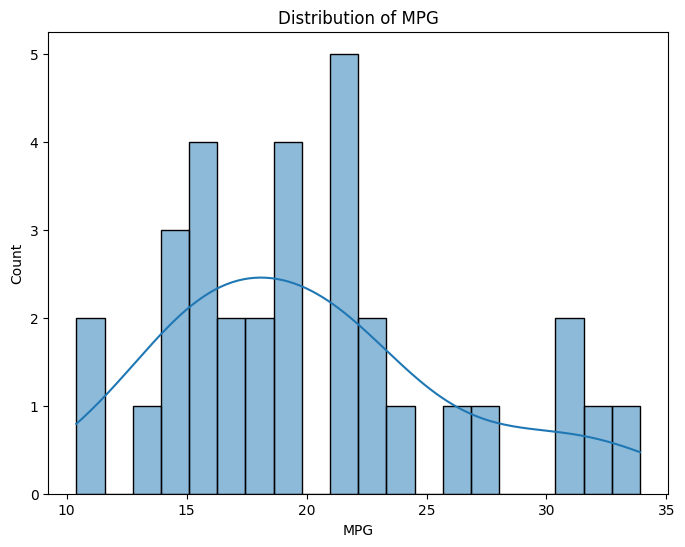

In [7]:
# 1.Distribution of mpg
plt.figure(figsize=(8, 6))
sns.histplot(data['mpg'], kde=True, bins=20)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Count')
plt.show()

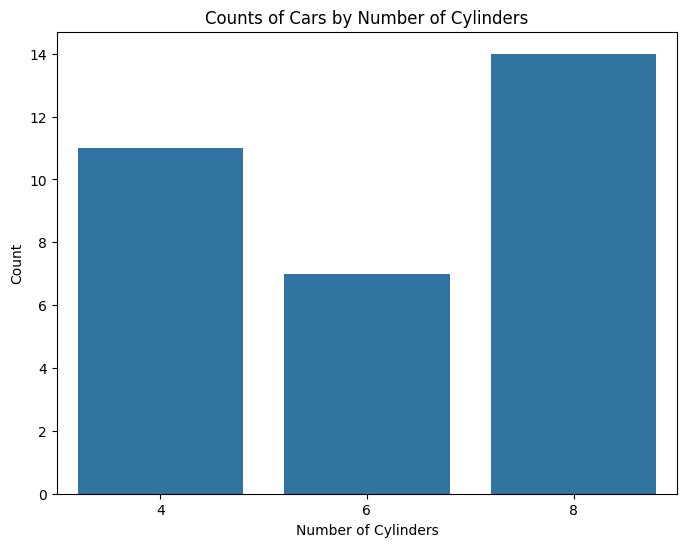

In [8]:
# 2.Counts of cars by cylinder type
plt.figure(figsize=(8, 6))
sns.countplot(x='cyl', data=data)
plt.title('Counts of Cars by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.show()

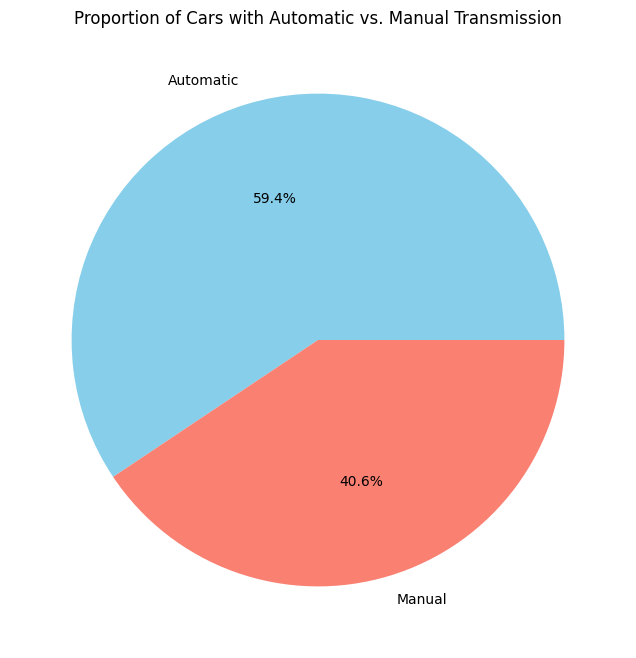

In [9]:
# 3.Proportion of cars with automatic vs. manual transmission
transmission_counts = data['am'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(transmission_counts, labels=['Automatic', 'Manual'], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Proportion of Cars with Automatic vs. Manual Transmission')
plt.show()


Text(0, 0.5, 'Frequency')

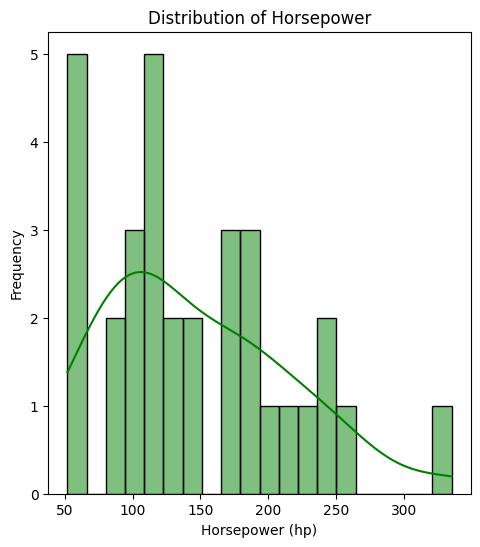

In [10]:
# 4.Distribution of hp (horsepower) and boxplot
plt.figure(figsize=(12, 6))

#Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['hp'], kde=True, bins=20, color='green')
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Frequency')

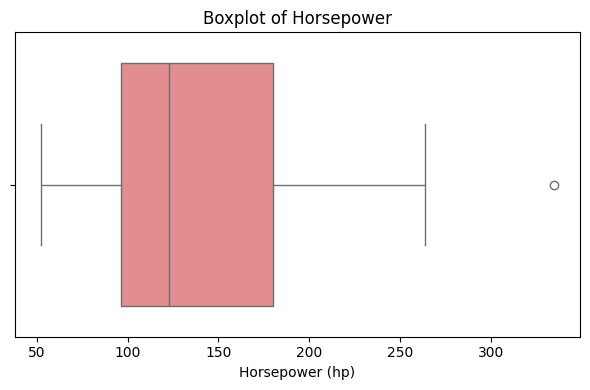

In [14]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['hp'], color='lightcoral')
plt.title('Boxplot of Horsepower')
plt.xlabel('Horsepower (hp)')

plt.tight_layout()
plt.show()

<ipython-input-17-3dc90aec9966>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='gear', palette='Set1')


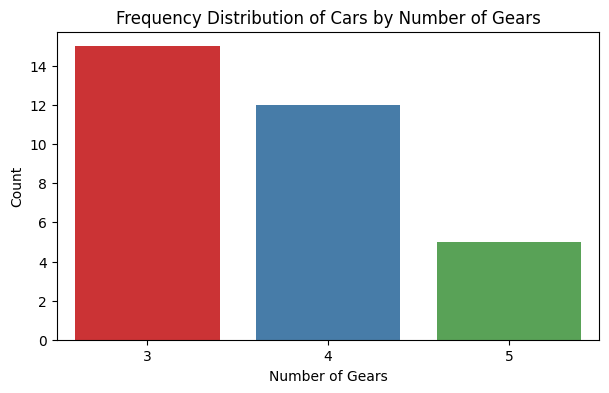

In [17]:
# 5.Frequency distribution of cars with different numbers of gears
plt.figure(figsize=(7, 4))
sns.countplot(data=data, x='gear', palette='Set1')
plt.title('Frequency Distribution of Cars by Number of Gears')
plt.xlabel('Number of Gears')
plt.ylabel('Count')
plt.show()

#Bonus Questions

###1. What is the relationship between weight (wt) and miles per gallon (mpg)?

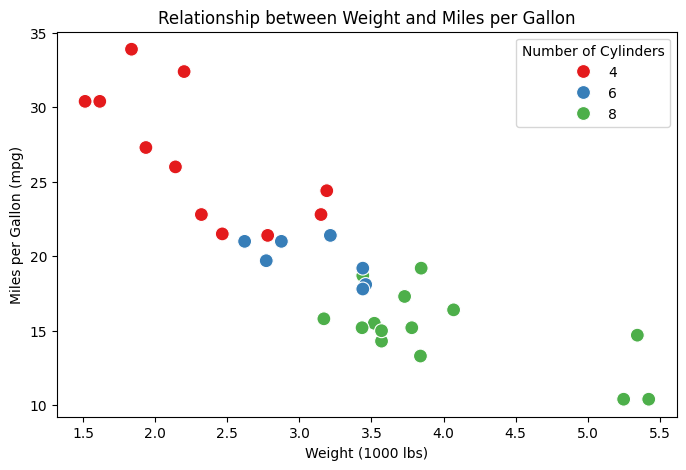

In [20]:
# 1. Relationship between weight (wt) and miles per gallon (mpg)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='wt', y='mpg', hue='cyl', palette='Set1', s=100)
plt.title('Relationship between Weight and Miles per Gallon')
plt.xlabel('Weight (1000 lbs)')
plt.ylabel('Miles per Gallon (mpg)')
plt.legend(title='Number of Cylinders')
plt.show()

###3. How does the distribution of qsec (1/4 mile time) vary across different numbers of cylinders (cyl)?

<ipython-input-24-d0f35d5b8c94>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='cyl', y='qsec', palette='Set2')


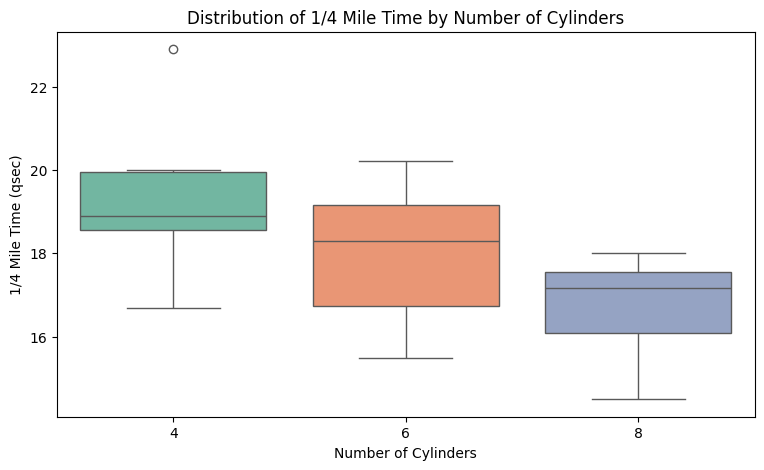

In [24]:
# 2. Distribution of qsec by number of cylinders
plt.figure(figsize=(9, 5))
sns.boxplot(data=data, x='cyl', y='qsec', palette='Set2')
plt.title('Distribution of 1/4 Mile Time by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('1/4 Mile Time (qsec)')
plt.show()

###3. What is the correlation matrix of the numeric variables in the dataset?

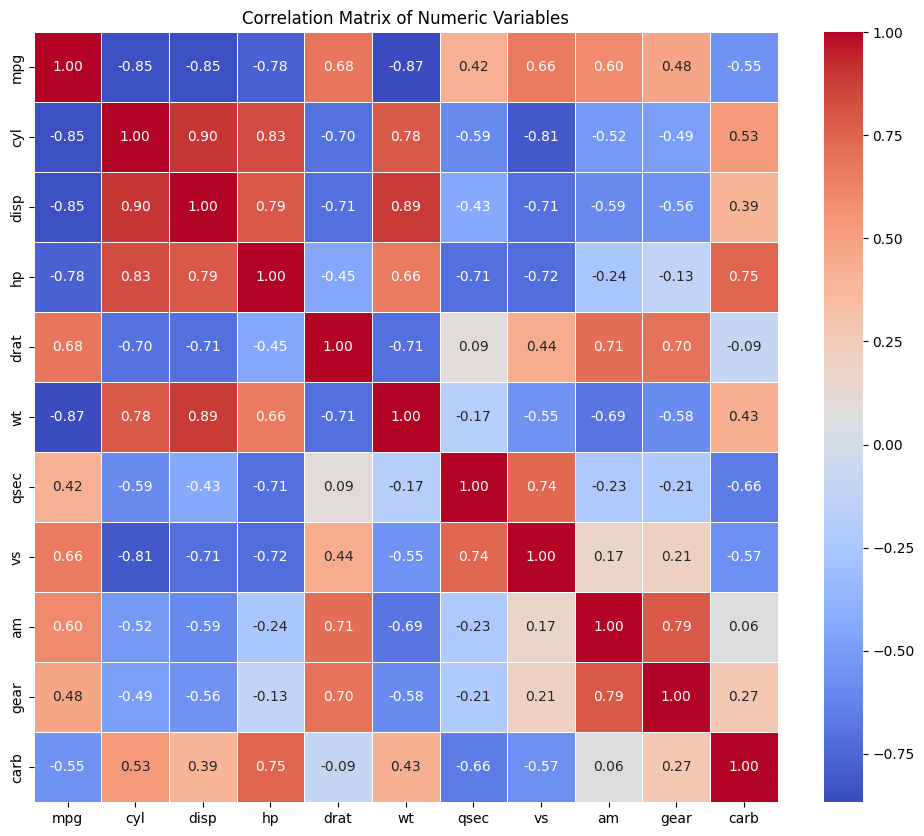

In [25]:
# 3. Correlation matrix of numeric variables
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

#2.b. Visualize Datasaurus dozen

In [35]:
df = pd.read_csv('/content/DatasaurusDozen.csv')

In [36]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

In [37]:
# Get the unique dataset names
datasets = df['dataset'].unique()

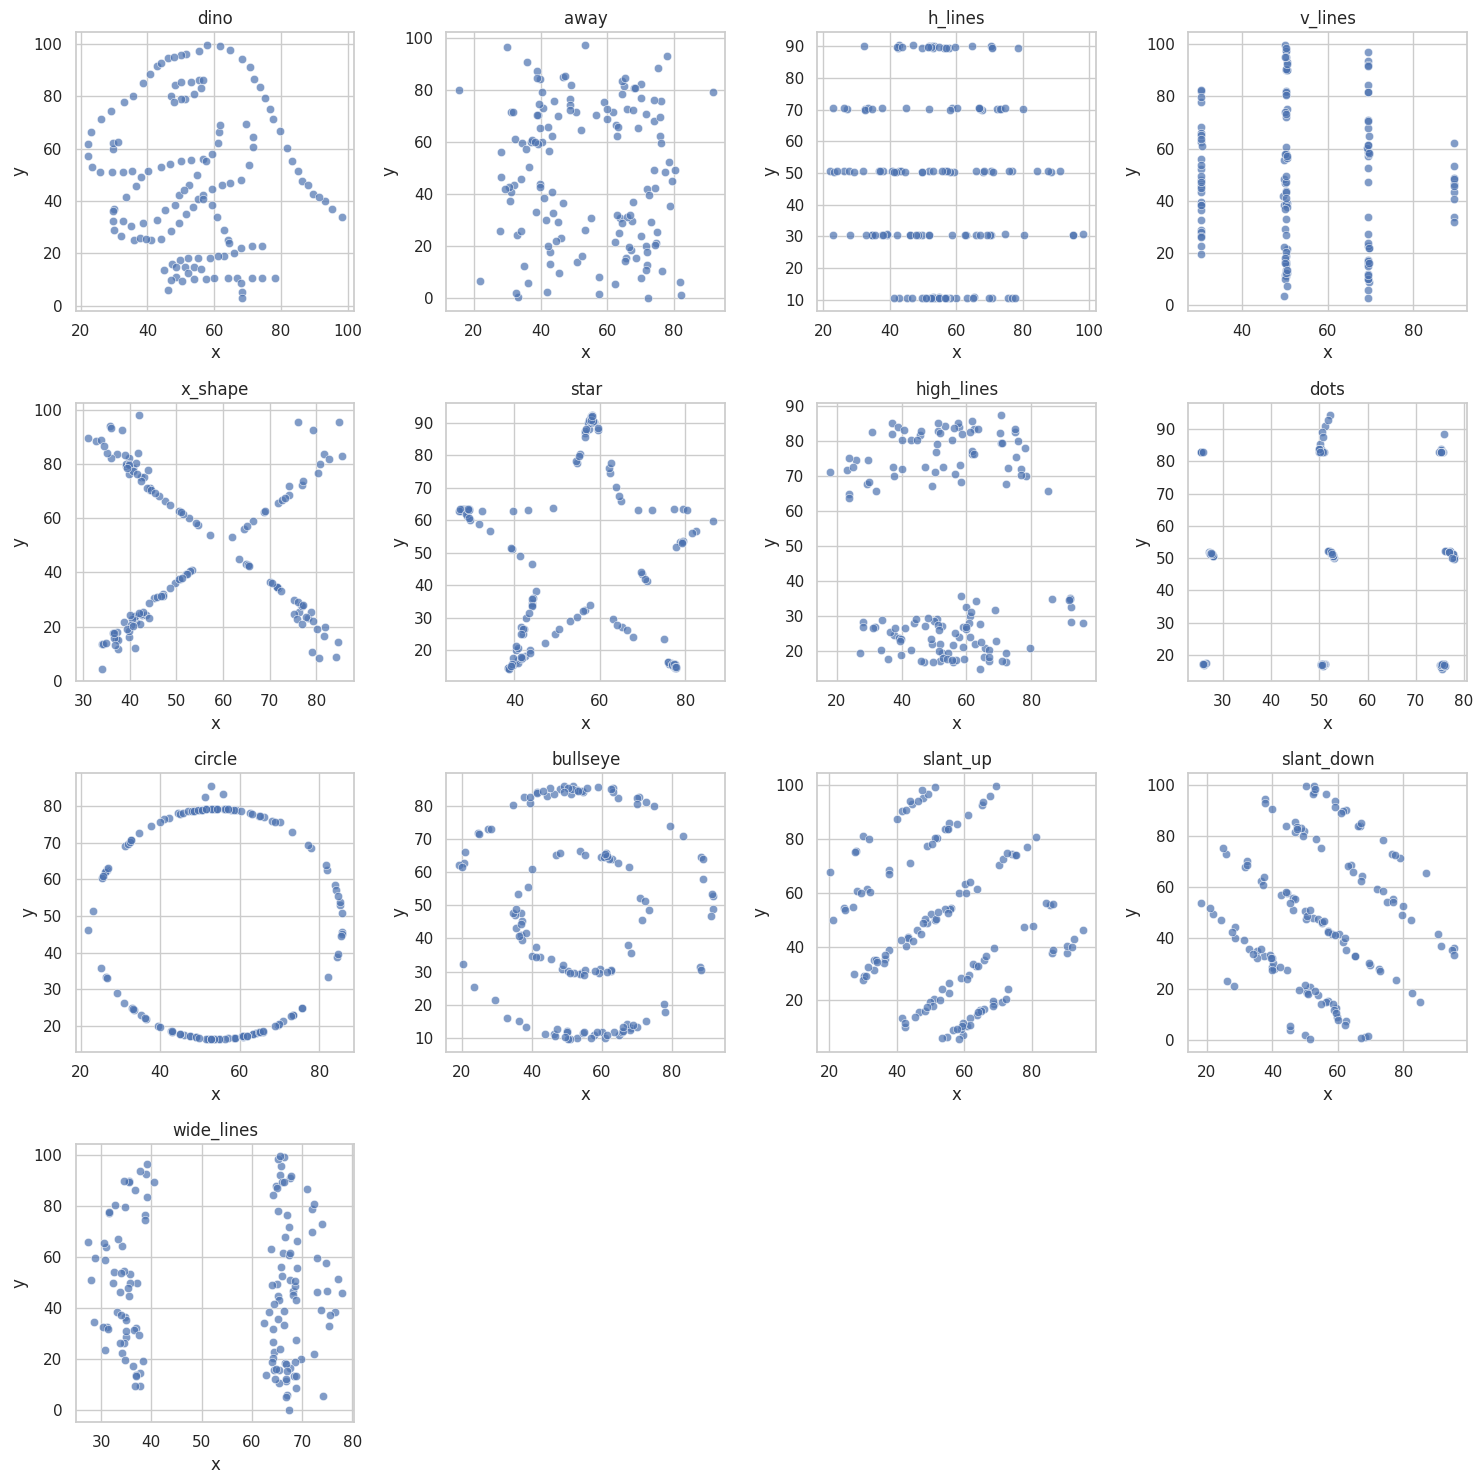

In [42]:
# Plot each dataset
plt.figure(figsize=(15, 15))

for i, dataset_name in enumerate(datasets):
    plt.subplot(4, 4, i + 1)  # Adjust grid size to 4x4 to fit more plots
    subset = df[df['dataset'] == dataset_name]
    sns.scatterplot(data=subset, x='x', y='y', alpha=0.7)
    plt.title(dataset_name)
    plt.xlabel('x')
    plt.ylabel('y')

plt.tight_layout()
plt.show()